# Trace Clustering in Process Mining

## Importing librarires

In [1]:
import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
from pm4py.objects.log.log import EventLog


## Importing log
Importing event log of RoadTraffic. It is in XES format with 51 traces.

In [4]:
# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('DataSets/Repair.xes')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 1104/1104 [00:02<00:00, 483.50it/s]


## Petrinet from Alpha miner on complete log

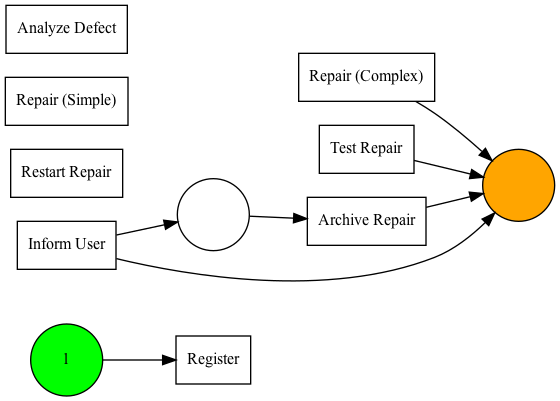

In [5]:
## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness

In [6]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, im, fm = alpha_miner.apply(log)
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
#prec
#fitness, type(fitness)
print('Fitness of log is: ', fitness['log_fitness']*100,'%')
print('Precision of log is: ', prec*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 233/233 [00:00<00:00, 382.18it/s]

Fitness of log is:  68.28336942892967 %
Precision of log is:  23.940950770631463 %


### Extracting total Activities

In [8]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
resources = attributes_filter.get_attribute_values(log, "org:resource")
activities,resources

({'Register': 1104,
  'Analyze Defect': 2208,
  'Repair (Complex)': 1449,
  'Test Repair': 3016,
  'Inform User': 1102,
  'Archive Repair': 1000,
  'Repair (Simple)': 1570,
  'Restart Repair': 406},
 {'System': 3612,
  'Tester3': 910,
  'SolverC1': 534,
  'Tester2': 904,
  'SolverS1': 592,
  'Tester6': 876,
  'SolverS2': 498,
  'Tester4': 788,
  'Tester1': 902,
  'SolverS3': 480,
  'SolverC3': 401,
  'Tester5': 844,
  'SolverC2': 514})

### Converting activity keys in to a list

In [9]:
activities_array = activities.keys()
activities_array = list(activities_array)
activities_array


['Register',
 'Analyze Defect',
 'Repair (Complex)',
 'Test Repair',
 'Inform User',
 'Archive Repair',
 'Repair (Simple)',
 'Restart Repair']

### Getting activities of each Trace in a Dataframe

In [10]:
## Converting log in to a pandas dataframe
from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
#dataframe.to_csv('log.csv')
#dataframe
## Trace profiling on Activities
dataframe =dataframe[['case:concept:name','concept:name']]
dataframe

,case:concept:name,concept:name
0,1,Register
1,1,Analyze Defect
2,1,Analyze Defect
3,1,Repair (Complex)
4,1,Repair (Complex)
...,...,...
11850,999,Repair (Simple)
11851,999,Test Repair
11852,999,Test Repair
11853,999,Inform User


### Making np_array from Dataframe and grouping them on the basis of case identifier

In [11]:
np_arr = np.array(dataframe)
#np_arr
n = np.unique(np_arr[:,0])
events = np.array( [(np_arr[np_arr[:,0]==i,1]) for i in n] )
events

array([array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Complex)',
              'Repair (Complex)', 'Test Repair', 'Test Repair', 'Inform User',
              'Archive Repair'], dtype=object)                                   ,
       array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Simple)',
              'Repair (Simple)', 'Test Repair', 'Test Repair', 'Restart Repair',
              'Repair (Simple)', 'Inform User', 'Repair (Simple)', 'Test Repair',
              'Test Repair', 'Archive Repair'], dtype=object)                    ,
       array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Complex)',
              'Repair (Complex)', 'Test Repair', 'Test Repair', 'Inform User',
              'Archive Repair'], dtype=object)                                   ,
       ...,
       array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Complex)',
              'Repair (Complex)', 'Test Repair', 'Test Repair', 'Inform User',
            

## 2d Vector of Number of CASES X Number of Activities

In [12]:
length  = len(log)
width = len(activities)
length,width
vectors  = [ [0] * width for _ in range(length)]
type(vectors),len(vectors)
vectors

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 

## Activities Profiling - Updating Vector with the count of occurence of Activities

In [13]:
for i in range(len(events)):
        for j in range(len(events[i])):
                if events[i][j] == activities_array[0]:
                    vectors[i][0] += 1
                elif events[i][j] == activities_array[1]:
                    vectors[i][1] += 1
                elif events[i][j] == activities_array[2]:
                    vectors[i][2] += 1
                elif events[i][j] == activities_array[3]:
                    vectors[i][3] += 1
                elif events[i][j] == activities_array[4]:
                    vectors[i][4] += 1
                elif events[i][j] == activities_array[5]:
                    vectors[i][5] += 1
                elif events[i][j] == activities_array[6]:
                    vectors[i][6] += 1
                elif events[i][j] == activities_array[7]:
                    vectors[i][7] += 1
                

### Making ND-Array of the Activity Vector

In [14]:
np_vectors = np.array(vectors)
np_vectors

array([[1, 2, 2, ..., 1, 0, 0],
       [1, 2, 0, ..., 1, 4, 1],
       [1, 2, 2, ..., 1, 0, 0],
       ...,
       [1, 2, 2, ..., 1, 0, 0],
       [1, 2, 2, ..., 1, 0, 0],
       [1, 2, 0, ..., 1, 4, 1]])

## Elbow Method to find optimal number of clusters

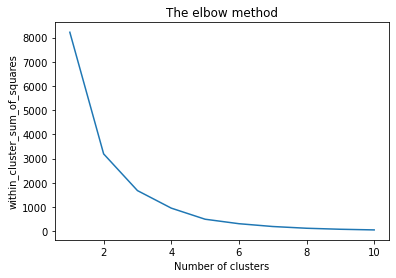

In [15]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(np_vectors)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()

# KMeans - Euclidean

In [16]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(np_vectors)
kmeans.labels_
clustered  = kmeans.predict(np_vectors)
clustered


array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

## Array of Sizes of clustered Data

In [17]:
count_arr = np.bincount(clustered)
print(count_arr)


[213 649 242]


## Creating Sub Event Logs based on Clustering Output

In [18]:
length1  = count_arr[0]
length2 = count_arr[1]
length3 = count_arr[2]

sub_log1 = EventLog()
sub_log2 = EventLog()
sub_log3 = EventLog()

for i in range(len(clustered)):
    if clustered[i] == 0:
        sub_log1.append(log[i])
    
    elif clustered[i] == 1:
        sub_log2.append(log[i])
        
    elif clustered[i] == 2: 
        sub_log3.append(log[i])

# Petrinets from Alpha miner on Sub Event Logs

## Petrinets from Alpha miner on Sub Event Log1

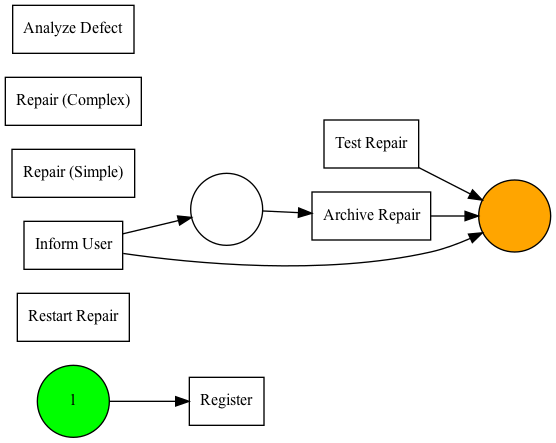

In [19]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [20]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
net, im, fm = alpha_miner.apply(sub_log1)
fitness = replay_fitness_evaluator.apply(sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 130/130 [00:00<00:00, 657.05it/s]


Fitness of Petrinet is:  66.40916355887055 %
Precision of Petrinet is:  21.288180610889775 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

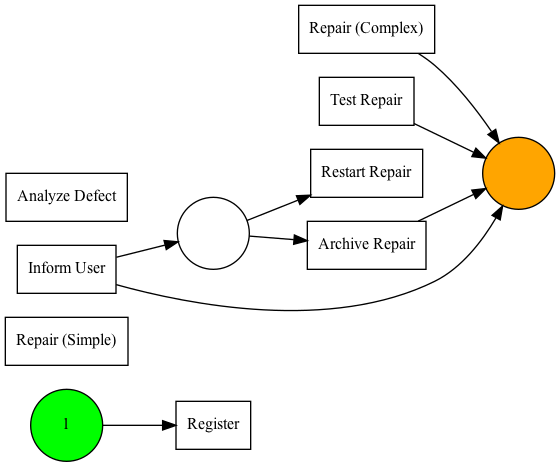

In [21]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [22]:

net, im, fm = alpha_miner.apply(sub_log2)
fitness = replay_fitness_evaluator.apply(sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 127/127 [00:00<00:00, 798.59it/s]

Fitness of Petrinet is:  65.07171214647775 %
Precision of Petrinet is:  25.9800510322431 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

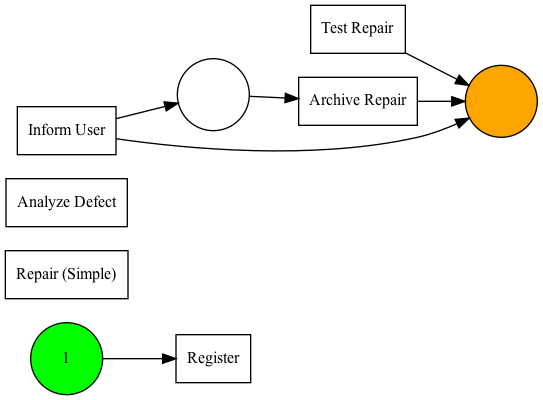

In [23]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub event log

In [24]:
net, im, fm = alpha_miner.apply(sub_log3)
fitness = replay_fitness_evaluator.apply(sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 19/19 [00:00<00:00, 1846.98it/s]

Fitness of Petrinet is:  74.45460942997889 %
Precision of Petrinet is:  28.781157583438954 %
Simplicity of Petrinet is:  100.0 %


# DB SCAN

## Hamming Distance

In [27]:
from sklearn.cluster import DBSCAN
clustering_DB_Hamm = DBSCAN(eps=0.3, min_samples=1, metric ='hamming').fit(np_vectors)


clustering_DB_Hamm = clustering_DB_Hamm.fit_predict(np_vectors)
clustering_DB_Hamm
# clustered = clustering.labels_
# clustered


array([0, 1, 0, ..., 0, 0, 1])

### Size of Clusters

In [28]:
count_arr_DB1 = np.bincount(clustering_DB_Hamm)
print(count_arr_DB1)


[811 182 109   2]


## Creating Sub Event Logs based on Clustering Output

In [30]:
length1  = count_arr_DB1[0]
length2 = count_arr_DB1[1]
length3 = count_arr_DB1[2]
length4 = count_arr_DB1[3]

sub_log1_DB1 = EventLog()
sub_log2_DB1 = EventLog()
sub_log3_DB1 = EventLog()
sub_log4_DB1 = EventLog()

for i in range(len(clustering_DB_Hamm)):
    if clustering_DB_Hamm[i] == 0:
        sub_log1_DB1.append(log[i])
    
    elif clustering_DB_Hamm[i] == 1:
        sub_log2_DB1.append(log[i])
        
    elif clustering_DB_Hamm[i] == 2: 
        sub_log3_DB1.append(log[i])

    elif clustering_DB_Hamm[i] == 3: 
        sub_log4_DB1.append(log[i])

 

## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Hamming Distance

### Petrinets from Alpha miner on Sub Event Log1

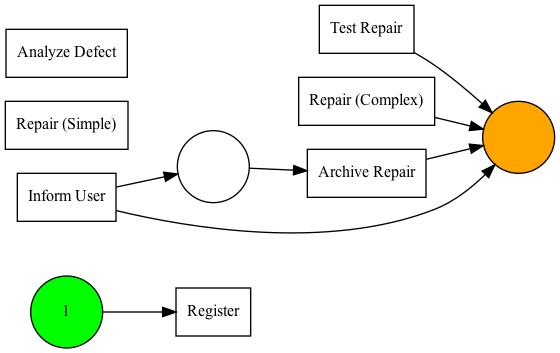

In [31]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [32]:
net, im, fm = alpha_miner.apply(sub_log1_DB1)
fitness = replay_fitness_evaluator.apply(sub_log1_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 37/37 [00:00<00:00, 1184.80it/s]

Fitness of Petrinet is:  69.9104578476094 %
Precision of Petrinet is:  25.95025331602129 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

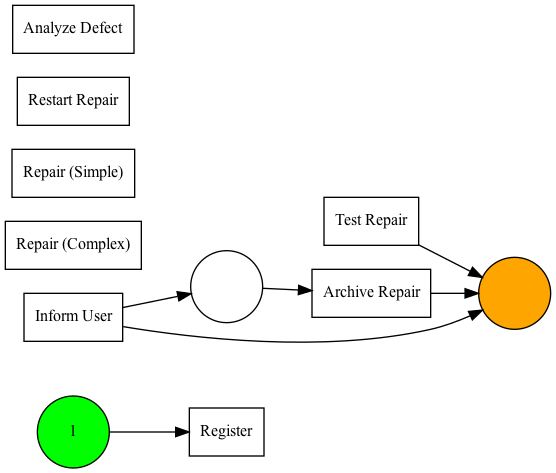

In [33]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [34]:
net, im, fm = alpha_miner.apply(sub_log2_DB1)
fitness = replay_fitness_evaluator.apply(sub_log2_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 134/134 [00:00<00:00, 756.27it/s]

Fitness of Petrinet is:  68.33681280445371 %
Precision of Petrinet is:  22.85400524678177 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

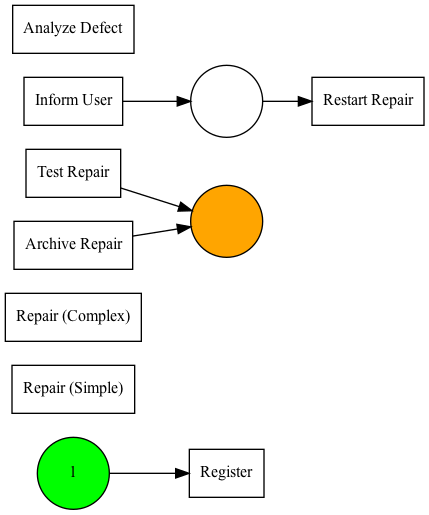

In [35]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [36]:
net, im, fm = alpha_miner.apply(sub_log3_DB1)
fitness = replay_fitness_evaluator.apply(sub_log3_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 191/191 [00:00<00:00, 748.83it/s]

Fitness of Petrinet is:  53.988749197719635 %
Precision of Petrinet is:  21.03393360284209 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 4

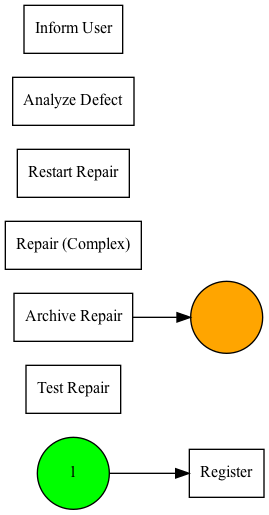

In [37]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log4_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 4

In [38]:
net, im, fm = alpha_miner.apply(sub_log4_DB1)
fitness = replay_fitness_evaluator.apply(sub_log4_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 23/23 [00:00<00:00, 1186.55it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  16.551724137931036 %
Simplicity of Petrinet is:  100.0 %


# DB Scan 
## Euclidean Distance

In [47]:
from sklearn.cluster import DBSCAN
clustering_DB_Euclidean = DBSCAN(eps=2.2, min_samples=1, metric ='euclidean').fit(np_vectors)


clustering_DB_Euclidean = clustering_DB_Euclidean.fit_predict(np_vectors)
clustering_DB_Euclidean
# clustered = clustering.labels_
# clustered


array([0, 1, 0, ..., 0, 0, 1])

### Size of Clusters

In [46]:
count_arr_DB2 = np.bincount(clustering_DB_Euclidean)
print(count_arr_DB2)


[567 115 242  88  10  29   2  38  11   2]


## Creating Sub Event Logs based on Clustering Output

In [58]:
length1  = count_arr_DB2[0]
length2 = count_arr_DB2[1]
length3 = count_arr_DB2[2]
length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_DB2 = EventLog()
sub_log2_DB2 = EventLog()
sub_log3_DB2 = EventLog()
sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Euclidean)):
    if clustering_DB_Euclidean[i] == 0:
        sub_log1_DB2.append(log[i])
    
    elif clustering_DB_Euclidean[i] == 1:
        sub_log2_DB2.append(log[i])
        
    elif clustering_DB_Euclidean[i] == 2: 
        sub_log3_DB2.append(log[i])
        
    elif clustering_DB_Euclidean[i] == 3: 
        sub_log4_DB2.append(log[i])


## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

### Petrinets from Alpha miner on Sub Event Log1

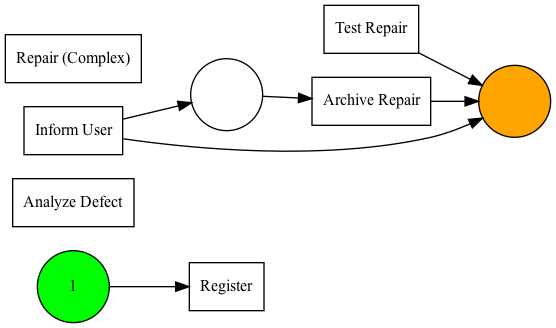

In [49]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_DB2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [50]:
net, im, fm = alpha_miner.apply(sub_log1_DB2)
fitness = replay_fitness_evaluator.apply(sub_log1_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 22/22 [00:00<00:00, 1544.50it/s]

Fitness of Petrinet is:  74.67996427508187 %
Precision of Petrinet is:  28.93558540586071 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

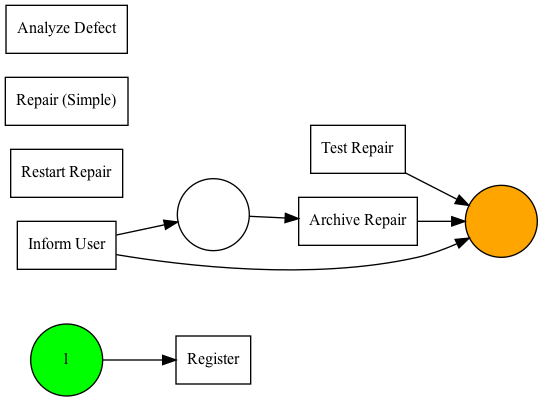

In [51]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_DB2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [52]:
net, im, fm = alpha_miner.apply(sub_log2_DB2)
fitness = replay_fitness_evaluator.apply(sub_log2_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 64/64 [00:00<00:00, 1525.37it/s]

Fitness of Petrinet is:  68.26710816777042 %
Precision of Petrinet is:  25.068775790921592 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

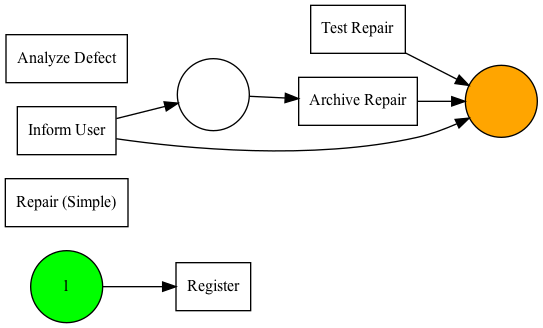

In [53]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_DB2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [54]:
net, im, fm = alpha_miner.apply(sub_log3_DB2)
fitness = replay_fitness_evaluator.apply(sub_log3_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 19/19 [00:00<00:00, 2239.48it/s]

Fitness of Petrinet is:  74.45460942997889 %
Precision of Petrinet is:  28.781157583438954 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log4

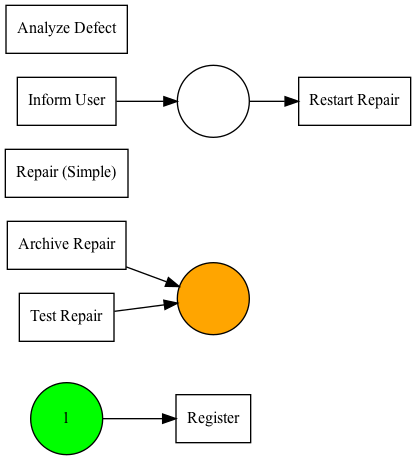

In [59]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log4_DB2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [60]:
net, im, fm = alpha_miner.apply(sub_log4_DB2)
fitness = replay_fitness_evaluator.apply(sub_log4_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 105/105 [00:00<00:00, 430.41it/s]

Fitness of Petrinet is:  53.925092764378476 %
Precision of Petrinet is:  23.427844420210832 %
Simplicity of Petrinet is:  100.0 %


# DB Scan
## Jaccard  Distance

In [73]:
from sklearn.cluster import DBSCAN
clustering_DB_Jaccard = DBSCAN(eps=0.15, min_samples=10, metric ='jaccard').fit(np_vectors)
clustering_DB_Jaccard = clustering_DB_Jaccard.fit_predict(np_vectors)
clustering_DB_Jaccard
# clustered = clustering.labels_
# clustered

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
# Removing Negative values by scaling by 1
for i in range(len(clustering_DB_Jaccard)):
    clustering_DB_Jaccard[i]=clustering_DB_Jaccard[i]+1

In [75]:
count_arr_DB3 = np.bincount(clustering_DB_Jaccard)
print(count_arr_DB3)


[   2 1028   43   31]


## Creating Sub Event Logs based on Clustering Output

In [78]:
length1  = count_arr_DB3[0]
length2 = count_arr_DB3[1]
length3 = count_arr_DB3[2]
length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_DB3 = EventLog()
sub_log2_DB3 = EventLog()
sub_log3_DB3 = EventLog()
sub_log4_DB3 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Jaccard)):
    if clustering_DB_Jaccard[i] == 0:
        sub_log1_DB3.append(log[i])
    
    elif clustering_DB_Jaccard[i] == 1:
        sub_log2_DB3.append(log[i])
        
    elif clustering_DB_Jaccard[i] == 2: 
        sub_log3_DB3.append(log[i])
    elif clustering_DB_Jaccard[i] == 3: 
        sub_log4_DB3.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

## Petrinets from Alpha miner on Sub Event Log1

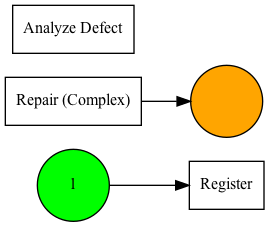

In [79]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_DB3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [80]:
net, im, fm = alpha_miner.apply(sub_log1_DB3)
fitness = replay_fitness_evaluator.apply(sub_log1_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 4/4 [00:00<00:00, 2331.14it/s]

Fitness of Petrinet is:  90.0 %
Precision of Petrinet is:  44.99999999999999 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

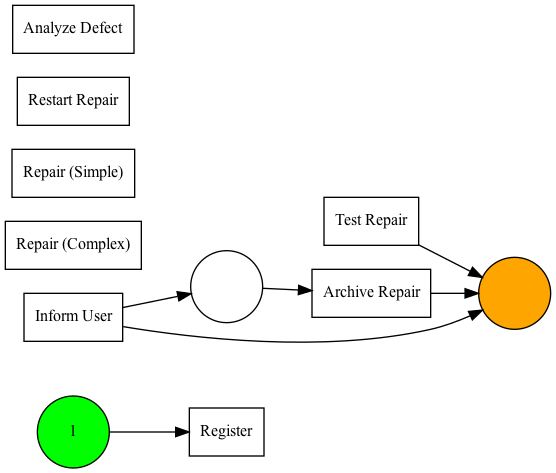

In [81]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_DB3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [82]:
net, im, fm = alpha_miner.apply(sub_log2_DB3)
fitness = replay_fitness_evaluator.apply(sub_log2_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 233/233 [00:00<00:00, 1123.12it/s]

Fitness of Petrinet is:  71.97928653624857 %
Precision of Petrinet is:  23.936490555707636 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

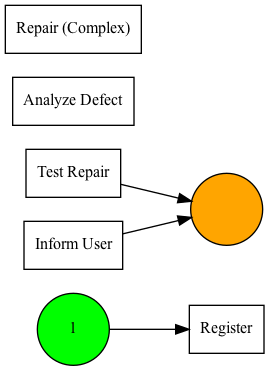

In [83]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_DB3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [84]:
net, im, fm = alpha_miner.apply(sub_log3_DB3)
fitness = replay_fitness_evaluator.apply(sub_log3_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 2467.14it/s]

Fitness of Petrinet is:  75.0 %
Precision of Petrinet is:  30.796335447498237 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log4

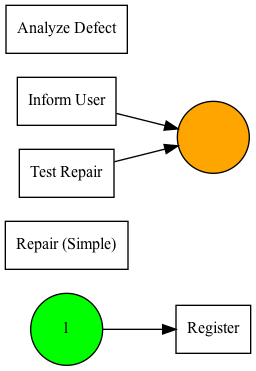

In [85]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log4_DB3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [86]:
net, im, fm = alpha_miner.apply(sub_log4_DB3)
fitness = replay_fitness_evaluator.apply(sub_log4_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 2124.34it/s]

Fitness of Petrinet is:  75.0 %
Precision of Petrinet is:  31.671554252199417 %
Simplicity of Petrinet is:  100.0 %


# Agglomerative Clustering
## Euclidean

In [87]:

from sklearn.cluster import AgglomerativeClustering

clustering_Agglomerative = AgglomerativeClustering(n_clusters=3,affinity='euclidean').fit(np_vectors)
clustering_Agglomerative =clustering_Agglomerative.labels_
clustering_Agglomerative

array([0, 1, 0, ..., 0, 0, 1])

In [88]:
count_arr_Aglomerative = np.bincount(clustering_Agglomerative)
print(count_arr_Aglomerative)


[620 242 242]


## Creating Sub Event Logs based on Clustering Output

In [89]:
length1  = count_arr_Aglomerative[0]
length2 = count_arr_Aglomerative[1]
length3 = count_arr_Aglomerative[2]
# length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_AG = EventLog()
sub_log2_AG = EventLog()
sub_log3_AG = EventLog()
# sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_Agglomerative)):
    if clustering_Agglomerative[i] == 0:
        sub_log1_AG.append(log[i])
    
    elif clustering_Agglomerative[i] == 1:
        sub_log2_AG.append(log[i])
        
    elif clustering_Agglomerative[i] == 2: 
        sub_log3_AG.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

## Petrinets from Alpha miner on Sub Event Log1

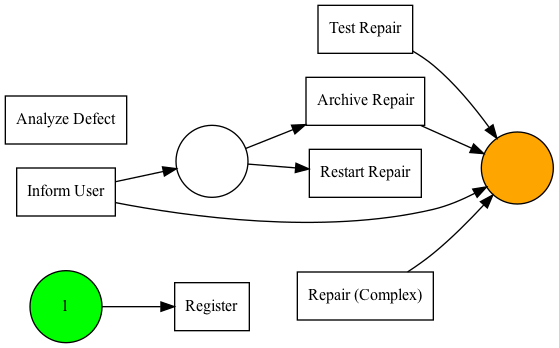

In [90]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_AG)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [91]:
net, im, fm = alpha_miner.apply(sub_log1_AG)
fitness = replay_fitness_evaluator.apply(sub_log1_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 82/82 [00:00<00:00, 1536.75it/s]

Fitness of Petrinet is:  65.82066617016824 %
Precision of Petrinet is:  28.919577579203903 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

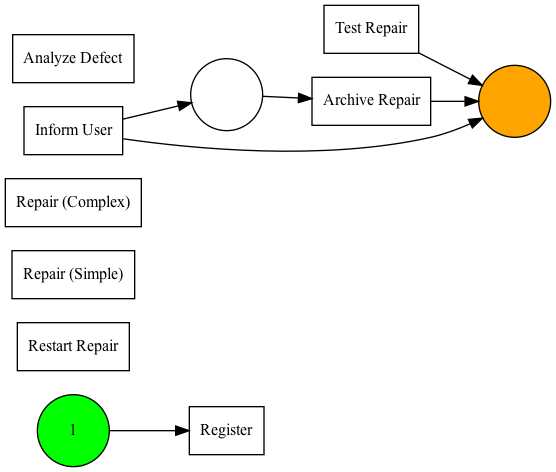

In [92]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_AG)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [93]:
net, im, fm = alpha_miner.apply(sub_log2_AG)
fitness = replay_fitness_evaluator.apply(sub_log2_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 155/155 [00:00<00:00, 905.09it/s]

Fitness of Petrinet is:  66.61918328584994 %
Precision of Petrinet is:  22.2085548765971 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

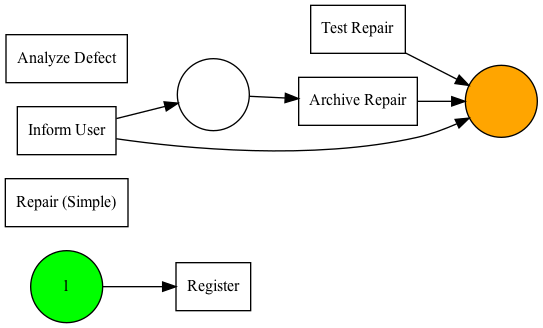

In [94]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_AG)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [95]:
net, im, fm = alpha_miner.apply(sub_log3_AG)
fitness = replay_fitness_evaluator.apply(sub_log3_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 19/19 [00:00<00:00, 1607.14it/s]

Fitness of Petrinet is:  74.45460942997889 %
Precision of Petrinet is:  28.781157583438954 %
Simplicity of Petrinet is:  100.0 %


# Self Organizing Maps - SOM


[array([6, 0]), array([4, 9]), array([6, 0]), array([9, 9]), array([9, 3]), array([8, 6]), array([4, 7]), array([8, 6]), array([8, 6]), array([9, 3]), array([8, 6]), array([0, 9]), array([9, 3]), array([6, 0]), array([4, 7]), array([9, 3]), array([9, 3]), array([9, 3]), array([8, 6]), array([9, 3]), array([0, 9]), array([8, 6]), array([9, 3]), array([9, 3]), array([6, 0]), array([9, 3]), array([9, 3]), array([8, 6]), array([9, 3]), array([0, 5]), array([8, 6]), array([9, 3]), array([8, 6]), array([9, 3]), array([8, 6]), array([6, 0]), array([8, 6]), array([9, 3]), array([8, 6]), array([4, 7]), array([4, 7]), array([9, 3]), array([9, 3]), array([8, 6]), array([9, 3]), array([9, 3]), array([6, 0]), array([8, 6]), array([0, 9]), array([8, 6]), array([8, 6]), array([9, 3]), array([8, 6]), array([9, 3]), array([4, 7]), array([9, 3]), array([9, 3]), array([6, 0]), array([8, 6]), array([4, 7]), array([9, 3]), array([8, 6]), array([8, 6]), array([8, 6]), array([4, 7]), array([9, 3]), array([2,

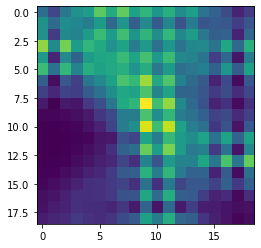

In [96]:
import susi
import numpy as np
import matplotlib.pyplot as plt
som = susi.SOMClustering()
som.fit(np_vectors)
umat = som.get_u_matrix()
clusters = som.get_bmus(np_vectors)
print(clusters)
plt.imshow(np.squeeze(umat))

### Unique Clusters

In [97]:
unique_clusters = np.unique(clusters, axis=0)
unique_clusters

array([[0, 0],
       [0, 5],
       [0, 9],
       [1, 0],
       [2, 4],
       [4, 7],
       [4, 9],
       [6, 0],
       [8, 6],
       [9, 3],
       [9, 4],
       [9, 9]])

## Making Sub Event Logs on the basis of SOM Clusters

In [98]:

som_sub_log1 = EventLog()
som_sub_log2 = EventLog()
som_sub_log3 = EventLog()
som_sub_log4 = EventLog()
som_sub_log5 = EventLog()
som_sub_log6 = EventLog()
som_sub_log7 = EventLog()
som_sub_log8 = EventLog()
som_sub_log9 = EventLog()
som_sub_log10 = EventLog()
som_sub_log11 = EventLog()
som_sub_log12 = EventLog()


for i in range(len(clusters)):
    if clusters[i][0] == 0 and clusters[i][1] ==0:
        som_sub_log1.append(log[i])
    
    elif clusters[i][0] == 0 and clusters[i][1] ==5:
        som_sub_log2.append(log[i])

    elif clusters[i][0] == 0 and clusters[i][1] ==9:
        som_sub_log3.append(log[i])
        
    elif clusters[i][0] == 1 and clusters[i][1] ==0:
        som_sub_log4.append(log[i])

    elif clusters[i][0] == 2 and clusters[i][1] ==4:
        som_sub_log5.append(log[i])

    elif clusters[i][0] == 4 and clusters[i][1] ==7:
        som_sub_log6.append(log[i])

    elif clusters[i][0] == 4 and clusters[i][1] ==9:
        som_sub_log7.append(log[i])

    elif clusters[i][0] == 6 and clusters[i][1] ==0:
        som_sub_log8.append(log[i])

    elif clusters[i][0] == 8 and clusters[i][1] ==6:
        som_sub_log9.append(log[i])
        
    elif clusters[i][0] == 9 and clusters[i][1] ==3:
        som_sub_log10.append(log[i])

    elif clusters[i][0] == 9 and clusters[i][1] ==4:
        som_sub_log11.append(log[i])

    elif clusters[i][0] == 9 and clusters[i][1] ==9:
        som_sub_log12.append(log[i])


### Checking sizes of clusters

In [99]:
len(som_sub_log1),len(som_sub_log2),len(som_sub_log3),len(som_sub_log4),len(som_sub_log5),len(som_sub_log6)

(13, 10, 88, 38, 29, 14)

In [100]:
len(som_sub_log7),len(som_sub_log8),len(som_sub_log9),len(som_sub_log10),len(som_sub_log11),len(som_sub_log12)

(101, 524, 31, 44, 1, 211)

# Petrinets from Alpha miner on Sub Event Logs generated from SOM

## Petrinets from Alpha miner on Sub Event Log1

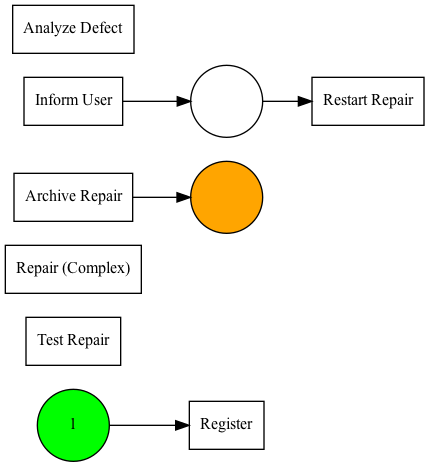

In [101]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [102]:
net, im, fm = alpha_miner.apply(som_sub_log1)
fitness = replay_fitness_evaluator.apply(som_sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 75/75 [00:00<00:00, 1325.79it/s]

Fitness of Petrinet is:  86.11111111111111 %
Precision of Petrinet is:  20.91212458286985 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

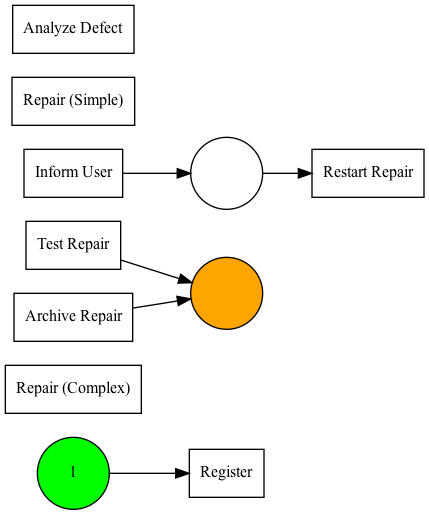

In [103]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [104]:
net, im, fm = alpha_miner.apply(som_sub_log2)
fitness = replay_fitness_evaluator.apply(som_sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 64/64 [00:00<00:00, 1151.87it/s]

Fitness of Petrinet is:  54.35393258426966 %
Precision of Petrinet is:  17.966573816155986 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

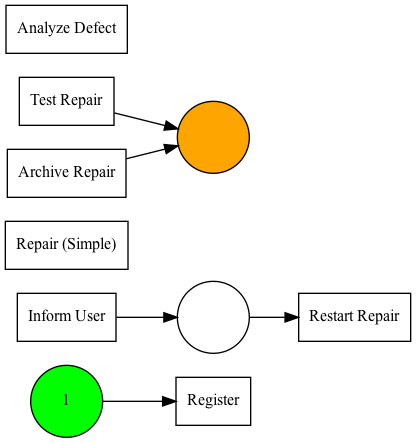

In [105]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [106]:
net, im, fm = alpha_miner.apply(som_sub_log3)
fitness = replay_fitness_evaluator.apply(som_sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 105/105 [00:00<00:00, 1386.07it/s]

Fitness of Petrinet is:  53.925092764378476 %
Precision of Petrinet is:  23.427844420210832 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 4

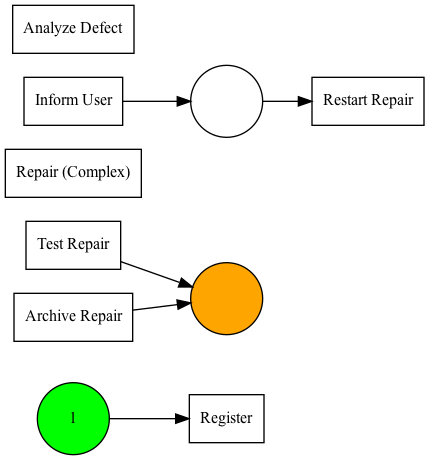

In [107]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log4)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 4

In [108]:
net, im, fm = alpha_miner.apply(som_sub_log4)
fitness = replay_fitness_evaluator.apply(som_sub_log4, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log4, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 49/49 [00:00<00:00, 1442.28it/s]

Fitness of Petrinet is:  62.799043062200965 %
Precision of Petrinet is:  23.1457800511509 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 5

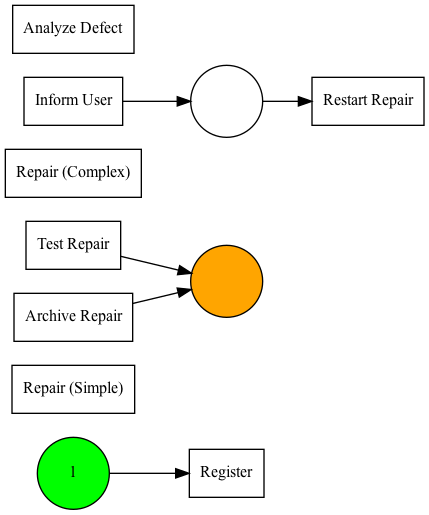

In [109]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log5)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 5

In [110]:
net, im, fm = alpha_miner.apply(som_sub_log5)
fitness = replay_fitness_evaluator.apply(som_sub_log5, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log5, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 49/49 [00:00<00:00, 1425.04it/s]

Fitness of Petrinet is:  60.20402298850575 %
Precision of Petrinet is:  19.819819819819816 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 6

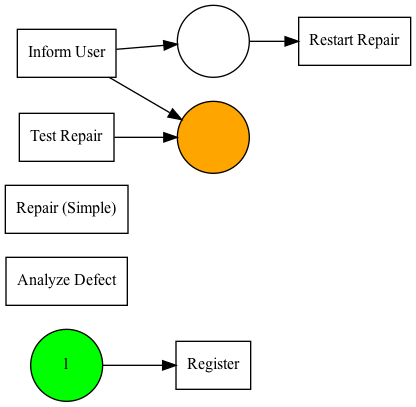

In [111]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log6)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 6

In [112]:
net, im, fm = alpha_miner.apply(som_sub_log6)
fitness = replay_fitness_evaluator.apply(som_sub_log6, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log6, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 43/43 [00:00<00:00, 1179.79it/s]

Fitness of Petrinet is:  62.9251700680272 %
Precision of Petrinet is:  28.000000000000004 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log7

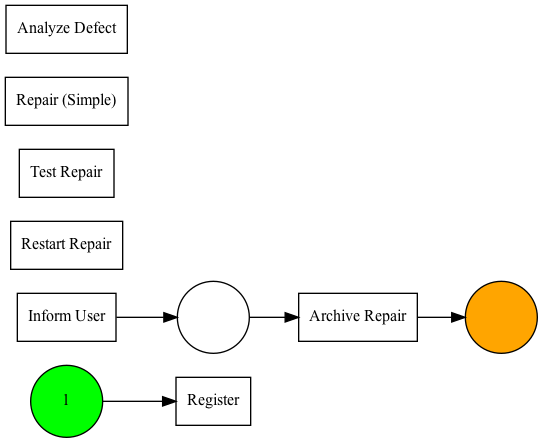

In [113]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log7)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of som_sub_log7

In [114]:
net, im, fm = alpha_miner.apply(som_sub_log7)
fitness = replay_fitness_evaluator.apply(som_sub_log7, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log7, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 64/64 [00:00<00:00, 1808.38it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  25.213675213675213 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 8

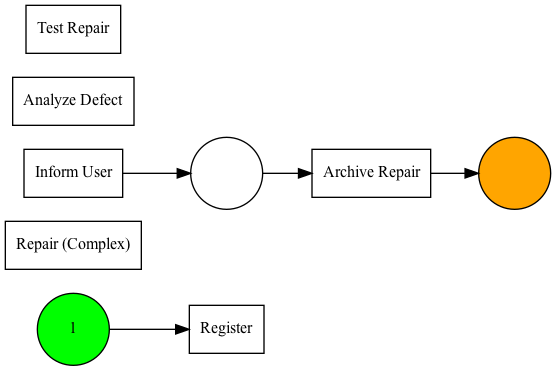

In [115]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log8)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [116]:
net, im, fm = alpha_miner.apply(som_sub_log8)
fitness = replay_fitness_evaluator.apply(som_sub_log8, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log8, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 22/22 [00:00<00:00, 2815.83it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  28.86808591522524 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 9

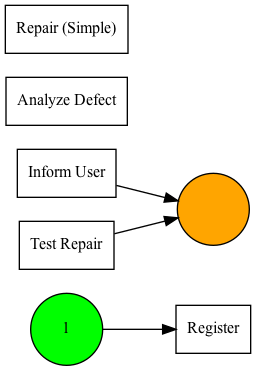

In [117]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log9)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 9

In [118]:
net, im, fm = alpha_miner.apply(som_sub_log9)
fitness = replay_fitness_evaluator.apply(som_sub_log9, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log9, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 1788.06it/s]

Fitness of Petrinet is:  75.0 %
Precision of Petrinet is:  31.671554252199417 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 10

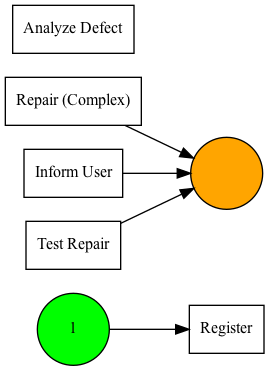

In [119]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log10)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 10

In [120]:
net, im, fm = alpha_miner.apply(som_sub_log10)
fitness = replay_fitness_evaluator.apply(som_sub_log10, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log10, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 15/15 [00:00<00:00, 1757.88it/s]

Fitness of Petrinet is:  66.85823754789271 %
Precision of Petrinet is:  30.833333333333336 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 11

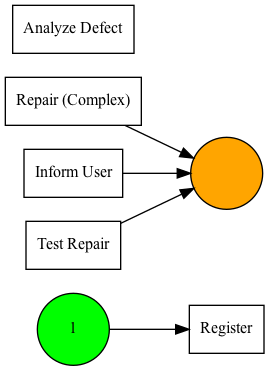

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log11)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 12

In [121]:
net, im, fm = alpha_miner.apply(som_sub_log11)
fitness = replay_fitness_evaluator.apply(som_sub_log11, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log11, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 3/3 [00:00<00:00, 2750.36it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  44.44444444444444 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 12

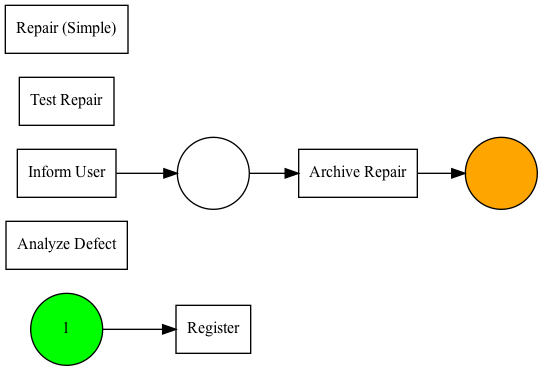

In [122]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log12)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 12

In [124]:
net, im, fm = alpha_miner.apply(som_sub_log12)
fitness = replay_fitness_evaluator.apply(som_sub_log12, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log12, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 19/19 [00:00<00:00, 2970.58it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  28.596950929013822 %
Simplicity of Petrinet is:  100.0 %
